<div><img src="photo.png"></div>

<div style="font-size: 30px;color: #CD5C5C">Objectifs: </div>
<div style=" color:#454545"><p>•Maitriser l’API de twitter pour l’extraction des tweets</p>
<p>•Maitriser la partie NLP (naturallanguageprocessing) avec NLTK en Python</p>
<p>•Appliquer les principes de nettoyage des données</p>
<p>•Classer les tweets</p></div>

<div style="font-size: 20px;color: #CC5C5C">Installation du bibliothèque de tweeter: </div>


In [4]:
pip install tweepy

You should consider upgrading via the '/home/client/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
from tweepy import OAuthHandler
from tweepy import API

# Consumer key authentication
auth = OAuthHandler("qIwnNNJMkjBzFGXbvIfDCx5L1", "qBDTDdhi0PtgPg2SBIdZGOE5KpXqcjjQHdMXIXazbfa6wkxpb2")

# Access key authentication
auth.set_access_token("1338511495739674629-uCRKkRhkSBdUJO45rzkn4am36WEM4w", "889fsak4U775JstxLLgfaUcrEVYoJJS7ikBUUQNaMl5m4")

# Set up the API with the authentication handler
api = API(auth)

In [3]:
from tweepy.streaming import StreamListener
import json
import time
import sys

class SListener(StreamListener):
    def __init__(self, api = None, fprefix = 'streamer'):
        self.api = api or API()
        self.counter = 0
        self.fprefix = fprefix
        self.output  = open('%s_%s.json' % (self.fprefix, time.strftime('%Y%m%d-%H%M%S')), 'w')


    def on_data(self, data):
        if  'in_reply_to_status' in data:
            self.on_status(data)
        elif 'delete' in data:
            delete = json.loads(data)['delete']['status']
            if self.on_delete(delete['id'], delete['user_id']) is False:
                return False
        elif 'limit' in data:
            if self.on_limit(json.loads(data)['limit']['track']) is False:
                return False
        elif 'warning' in data:
            warning = json.loads(data)['warnings']
            print("WARNING: %s" % warning['message'])
            return


    def on_status(self, status):
        self.output.write(status)
        self.counter += 1
        if self.counter >= 20000:
            self.output.close()
            self.output  = open('%s_%s.json' % (self.fprefix, time.strftime('%Y%m%d-%H%M%S')), 'w')
            self.counter = 0
        return


    def on_delete(self, status_id, user_id):
        print("Delete notice")
        return


    def on_limit(self, track):
        print("WARNING: Limitation notice received, tweets missed: %d" % track)
        return


    def on_error(self, status_code):
        print('Encountered error with status code:', status_code)
        return 


    def on_timeout(self):
        print("Timeout, sleeping for 60 seconds...")
        time.sleep(60)
        return

In [3]:
from tweepy import Stream

# Set up words to track
keywords_to_track = ["welcome","today"]

# Instantiate the SListener object 
listen = SListener(api)

# Instantiate the Stream object
stream = Stream(auth, listen)

# Begin collecting data
stream.filter(track = keywords_to_track)

ProtocolError: ('Connection broken: IncompleteRead(0 bytes read)', IncompleteRead(0 bytes read))

In [4]:
 pip install simplejson

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install simplejson==3.16.0


     |████████████████████████████████| 81 kB 81 kB/s  eta 0:00:01
  Created wheel for simplejson: filename=simplejson-3.16.0-cp37-cp37m-linux_x86_64.whl size=124595 sha256=4453c653e45d33578731e1cf6809f821390f104cc2b178dce60ad4e6c5f7e967
  Stored in directory: /home/client/.cache/pip/wheels/00/6f/29/109ee3b85a9f9861d4294b05e4597363d5ad3c9dfaccc78787
Successfully built simplejson
  Attempting uninstall: simplejson
    Found existing installation: simplejson 3.17.2
    Uninstalling simplejson-3.17.2:
      Successfully uninstalled simplejson-3.17.2
Note: you may need to restart the kernel to use updated packages.


In [4]:
import glob
tweets = []
files  = list(glob.iglob('streamer_*.json'))
for f in files:
    fh = open(f, 'r', encoding = 'utf-8')
    tweets_json = fh.read().split("\n")

    ## remove empty lines
    tweets_json = list(filter(len, tweets_json))

    ## parse each tweet
    for tweet in tweets_json:
        try:
            tweet_obj = json.loads(tweet)

            ## flatten the file to include quoted status and retweeted status info
            if 'quoted_status' in tweet_obj:
                tweet_obj['quoted_status-text'] = tweet_obj['quoted_status']['text'] 
                tweet_obj['quoted_status-user-screen_name'] = tweet_obj['quoted_status']['user']['screen_name']

            if 'retweeted_status' in tweet_obj:
                tweet_obj['retweeted_status-user-screen_name'] = tweet_obj['retweeted_status']['user']['screen_name']
                tweet_obj['retweeted_status-text'] = tweet_obj['retweeted_status']['text']

            tweet_obj['user-screen_name'] = tweet_obj['user']['screen_name']

            tweets.append(tweet_obj)
        except:
            pass
print(len(tweets))

60512


In [5]:
## create pandas DataFrame for further analysis
import pandas as pd
df_tweet = pd.DataFrame(tweets)

In [5]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install regex


Note: you may need to restart the kernel to use updated packages.


In [5]:
df_tweet.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,...,retweeted_status,retweeted_status-text,retweeted_status-user-screen_name,source,text,timestamp_ms,truncated,user,user-screen_name,withheld_in_countries
0,None,None,Tue Dec 15 13:21:24 +0000 2020,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,{'created_at': 'Tue Dec 15 13:12:22 +0000 2020...,Guys Please help me to complete my 100 Followe...,imrohit34,"<a href=""http://twitter.com/download/android"" ...",RT @imrohit34: Guys Please help me to complete...,1608038484757,False,"{'id': 1324353424176029696, 'id_str': '1324353...",Anishachetri24,NaN
1,None,None,Tue Dec 15 13:21:24 +0000 2020,"[12, 61]","{'hashtags': [], 'urls': [], 'user_mentions': ...","{'media': [{'id': 1338836551753740293, 'id_str...",NaN,0,False,low,...,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",@RobertAlai Dude this Khatib today. He was eve...,1608038484651,False,"{'id': 1125299044568444928, 'id_str': '1125299...",alienkos,NaN
2,None,None,Tue Dec 15 13:21:24 +0000 2020,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,NaN,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",And today I need to stand strong again. It's o...,1608038484780,False,"{'id': 1155817040726249472, 'id_str': '1155817...",rollingnya,NaN
3,None,None,Tue Dec 15 13:21:24 +0000 2020,"[0, 37]","{'hashtags': [], 'urls': [], 'user_mentions': ...","{'media': [{'id': 1338836556375842818, 'id_str...",NaN,0,False,low,...,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",Soon you're going to run out of fuel. https://...,1608038484715,False,"{'id': 464866496, 'id_str': '464866496', 'name...",vkmutai,NaN
4,None,None,Tue Dec 15 13:21:24 +0000 2020,NaN,"{'hashtags': [{'text': 'FridayLivestream', 'in...",NaN,NaN,0,False,low,...,NaN,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",REQUEST @dimash_official @MTV #FridayLivestrea...,1608038484755,False,"{'id': 1316612154955624448, 'id_str': '1316612...",ET6gmalKlhO5D9b,NaN


In [6]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')

wordnet_lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'[a-z]+')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /home/client/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/client/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
df_tweet.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,...,retweeted_status-text,retweeted_status-user-screen_name,source,text,timestamp_ms,truncated,user,user-screen_name,withheld_in_countries,text_clean
0,None,None,Tue Dec 15 13:21:24 +0000 2020,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,Guys Please help me to complete my 100 Followe...,imrohit34,"<a href=""http://twitter.com/download/android"" ...",RT @imrohit34: Guys Please help me to complete...,1608038484757,False,"{'id': 1324353424176029696, 'id_str': '1324353...",Anishachetri24,NaN,Please help me to complete my 100 Today ? Foll...
1,None,None,Tue Dec 15 13:21:24 +0000 2020,"[12, 61]","{'hashtags': [], 'urls': [], 'user_mentions': ...","{'media': [{'id': 1338836551753740293, 'id_str...",NaN,0,False,low,...,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",@RobertAlai Dude this Khatib today. He was eve...,1608038484651,False,"{'id': 1125299044568444928, 'id_str': '1125299...",alienkos,NaN,Dude this Khatib today . He was even thinner t...
2,None,None,Tue Dec 15 13:21:24 +0000 2020,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",And today I need to stand strong again. It's o...,1608038484780,False,"{'id': 1155817040726249472, 'id_str': '1155817...",rollingnya,NaN,And today I need to stand strong again . It ' ...
3,None,None,Tue Dec 15 13:21:24 +0000 2020,"[0, 37]","{'hashtags': [], 'urls': [], 'user_mentions': ...","{'media': [{'id': 1338836556375842818, 'id_str...",NaN,0,False,low,...,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",Soon you're going to run out of fuel. https://...,1608038484715,False,"{'id': 464866496, 'id_str': '464866496', 'name...",vkmutai,NaN,Soon you ' re going to run out of fuel .
4,None,None,Tue Dec 15 13:21:24 +0000 2020,NaN,"{'hashtags': [{'text': 'FridayLivestream', 'in...",NaN,NaN,0,False,low,...,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",REQUEST @dimash_official @MTV #FridayLivestrea...,1608038484755,False,"{'id': 1316612154955624448, 'id_str': '1316612...",ET6gmalKlhO5D9b,NaN,REQUEST



**Suppression des colonnes vides**

In [7]:
to_drop = ['in_reply_to_status_id','contributors','geo', 'withheld_in_countries', 'place', 'in_reply_to_status_id_str',
           'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'coordinates','retweeted_status-user-screen_name',
           'retweeted_status-text','display_text_range', 'quoted_status_id','quoted_status_id_str','quoted_status','quoted_status_permalink',
           'quoted_status-text','quoted_status-user-screen_name','extended_entities','withheld_in_countries','extended_tweet'
           ]
df_tweet = df_tweet.drop(to_drop, axis=1)

In [8]:
print(df_tweet.shape)
df_tweet.drop_duplicates(subset=['text'],keep="first", inplace=True)
print(df_tweet.shape)


(60512, 21)
(37285, 21)


# Phase de "Cleaning Data"

In [9]:
#df_tweet.drop_duplicates()
df_tweet["text"][0]

'RT @imrohit34: Guys Please help me to complete my 100 Followers Today?\n\nFollow Me, I Will Follow Back..\n\nKING RKV IS BACK'

# Dropping ponctuations, emojis and URL:

In [10]:
import re
import emoji
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9_:]+","",str(tweet)) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) \
         if w.lower() in words or not w.isalpha())
    return tweet
df_tweet['text_clean'] = df_tweet['text'].map(lambda x: cleaner(x))

[nltk_data] Downloading package words to /home/client/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [11]:
print(df_tweet['text'])

0        RT @imrohit34: Guys Please help me to complete...
1        @RobertAlai Dude this Khatib today. He was eve...
2        And today I need to stand strong again. It's o...
3        Soon you're going to run out of fuel. https://...
4        REQUEST @dimash_official @MTV #FridayLivestrea...
5        Hello Karl!\n\nGood morning! Hope you have a g...
6        RT @LiviaSimela: Tune in at 15:00 GMT today to...
7        Old people don’t know wtf to say out their mou...
8        RT @SilasMiami: I hope Bridget Bema is doing w...
9        @marcusbignot @JamesMelville I think that trac...
10       Thank you sir for the consultation program coo...
11       Good morning beautiful followers! Today is a n...
12       RT @rvpochettino: Couple man got designer clot...
13       RT @Markiiese: They really told us his teeth w...
14       RT @mckellogs: Which HORF are you today? https...
15       Here is what is happening today:\nhttps://t.co...
16               RT @KurtSchlichter: OK this is just wei

# Clean text

In [12]:
print(df_tweet['text_clean'])

0        Please help me to complete my 100 Today ? Foll...
1        Dude this Khatib today . He was even thinner t...
2        And today I need to stand strong again . It ' ...
3                 Soon you ' re going to run out of fuel .
4                                                  REQUEST
5        Hello ! Good morning ! Hope you have a good da...
6        Tune in at 15 : 00 today to learn about analys...
7        Old people don ’ t know to say out their , it ...
8        I hope Bema is doing well today . I think abou...
9        I think that track and trace to be part of the...
10       Thank you sir for the consultation program by ...
11       Good morning beautiful ! Today is a new day to...
12       Couple man got designer clothes but rise up 10...
13       They really told us his teeth were wooden , wh...
14                                   Which are you today ?
15                       Here is what is happening today :
16                                      this is just wei

<div style="font-size: 25px;color: #FC5D0F"><strong>Tokenization :</strong></div>
<p></p>
La tokenisation cherche à transformer un texte en une série de tokens individuels. Dans l’idée, chaque token représente un mot, et identifier des mots semble être une tâche relativement simple

In [13]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df_tweet['Tweet_tokenized'] = df_tweet['text_clean'].apply(lambda x: tokenization(x.lower()))

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [15]:
#extracting key words
#Here I use the TfidfVectorizer since I'm hoping the IDF score will pull out unique words that I can use in clustering.
#There are lots of options to explore here to get different results, including CountVectorizer
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(df_tweet.text_clean)
text = tfidf.transform(df_tweet.text_clean)

<div style="font-size: 25px;color: #FC5D0F"><strong>The optimal clusters :</strong></div>


Fit 3 clusters
Fit 5 clusters
Fit 7 clusters
Fit 9 clusters
Fit 11 clusters
Fit 13 clusters
Fit 15 clusters
Fit 17 clusters
Fit 19 clusters
Fit 21 clusters
Fit 23 clusters
Fit 25 clusters
Fit 27 clusters
Fit 29 clusters


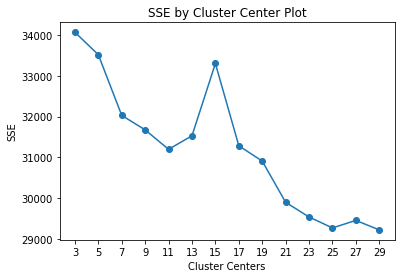

In [16]:
#Finding Optimal Clusters
def find_optimal_clusters(data, max_k):
    iters = range(3, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 30)

In [17]:
#k=19
df_tweet['clusters'] = KMeans(n_clusters=21, init='k-means++', max_iter=100, n_init=1).fit_predict(text)
clusters= KMeans(n_clusters=21, init='k-means++', max_iter=100, n_init=1).fit_predict(text) #added to visualize the hole numpy
print(df_tweet['clusters'])

0         7
1         7
2         7
3         7
4        11
5         7
6         7
7         0
8         7
9        19
10        7
11       19
12        7
13        7
14        7
15        7
16        7
17        7
18        7
19        7
20        7
21        7
22        7
23        7
24        7
25        7
26        7
27       17
28        7
29        7
         ..
60468     7
60469     7
60471     3
60472     7
60475     7
60476     7
60477     7
60478     7
60479     7
60481     7
60482     7
60484     7
60485    17
60486     7
60487     7
60488     0
60489     7
60492     7
60493     7
60497     7
60498     7
60499     7
60501     7
60504     7
60506     7
60507     7
60508     3
60509     7
60510     7
60511     7
Name: clusters, Length: 37285, dtype: int32


<div style="font-size: 25px;color: #FC5D0F"><strong>PLotting clusters :</strong></div>


In [26]:
pip install sklearn

You should consider upgrading via the '/home/client/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


37285


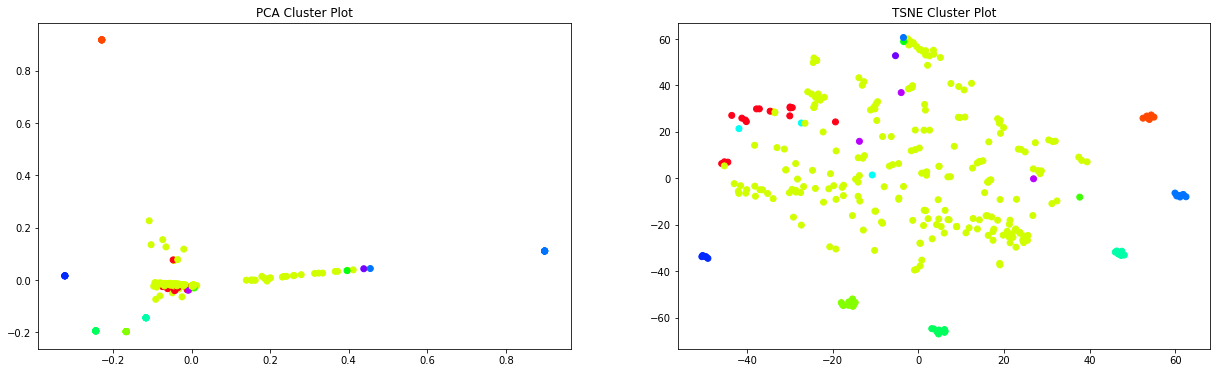

In [21]:
#Plotting Clusters
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(21, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)
print(len(clusters))

In [22]:
#Top Keywords
def get_top_keywords(data, clusters):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    df.head()
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(df_tweet[df_tweet['clusters']==i]['text'])
            
get_top_keywords(text, clusters)


Cluster 0
7        Old people don’t know wtf to say out their mou...
37       RT @rhodofansie: You don't need to know much a...
79       RT @enhypenvotecrew: 🏆 SMA; ROTY Category\n\nl...
137      RT @Kazeem: “Why don’t you just stay inside?” ...
139      @JoeVennare While I don't think Apple's moves ...
300      RT @squishyychenle: 201215 #CHENLE #辰乐 #천러 ♥️\...
384      RT @cjtruth: Remember, the fake news media is ...
479      RT @OFCSADBOI: ⠀⠀⠀\n⠀\n⠀⠀⠀⠀⠀ ⠀WELCOME!☠️\n⠀⠀⠀⠀...
505      RT @pghDSA: good morning, please don't make us...
516      RT @Nick_Milan_Top: 🔞💋Don't miss out on all th...
545      What's up? This is carol. Don't you want to fi...
581      RT @TheRightMelissa: Even if Biden gets 270  #...
626      RT @Meidas_UMaine: Sean Hannity is very annoye...
675      RT @OFCSADBOI: ⠀⠀⠀\n⠀\n⠀⠀⠀⠀⠀ ⠀WELCOME!☠️\n⠀⠀⠀⠀...
741      RT @Kazeem: “Why don’t you just stay inside?” ...
791      Waiting for the "And for only $5 more we will ...
853      RT @OFCSADBOI: ⠀⠀⠀\n⠀\n⠀⠀⠀⠀⠀ ⠀WELCOM

1096                     Ion feel up to being a TT today 😩
7326           i feel so insecure today this is NOT a vibe
12745    This is how I feel today... https://t.co/wm3rH...
14096    @KelemenCari @realDonaldTrump So how do you fe...
17145                            i feel so out of it today
18324               why do i feel so flirty today hahahaha
18978    @ufunnyafbribri i feel embarrassed for both of...
19159    Events almost align for you today ... but then...
19161    Events almost align for you today ... but then...
19162    Events almost align for you today ... but then...
19171    Events almost align for you today ... but then...
19182    Events almost align for you today ... but then...
19187    Events almost align for you today ... but then...
19193    Events almost align for you today ... but then...
19208    Events almost align for you today ... but then...
19211    Events almost align for you today ... but then...
19220    Events almost align for you today ... but then.